In [2]:
import torch
import torch.nn as nn
import torch
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset

from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import glob
import random

from PIL import Image

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(1234)
if device == 'cuda':
    torch.cuda.manual_seed_all(1234)

print(device)

cpu


In [4]:
df: pd.DataFrame = pd.read_csv('Annotasion2.csv', usecols=["Absolute path", "Class name"])
df: pd.DataFrame = df.rename(columns={'Absolute path': 'absPath',
               'Class name': 'className'})

In [5]:
probs = np.random.rand(len(df))
training_mask = probs < 0.8
test_mask = (probs>=0.8) & (probs < 0.9)
validatoin_mask = probs >= 0.9

df_training = df[training_mask]
df_test = df[test_mask]
df_validation = df[validatoin_mask]

print(df_training)

print(df_test)

print(df_validation)

                                              absPath className
1      C:\Users\nasty\ap_laba2\dataset2\rose_0001.jpg      rose
2      C:\Users\nasty\ap_laba2\dataset2\rose_0002.jpg      rose
3      C:\Users\nasty\ap_laba2\dataset2\rose_0003.jpg      rose
4      C:\Users\nasty\ap_laba2\dataset2\rose_0004.jpg      rose
5      C:\Users\nasty\ap_laba2\dataset2\rose_0005.jpg      rose
...                                               ...       ...
1996  C:\Users\nasty\ap_laba2\dataset2\tulip_0995.jpg     tulip
1997  C:\Users\nasty\ap_laba2\dataset2\tulip_0996.jpg     tulip
1998  C:\Users\nasty\ap_laba2\dataset2\tulip_0997.jpg     tulip
1999  C:\Users\nasty\ap_laba2\dataset2\tulip_0998.jpg     tulip
2001  C:\Users\nasty\ap_laba2\dataset2\tulip_1000.jpg     tulip

[1583 rows x 2 columns]
                                              absPath className
0      C:\Users\nasty\ap_laba2\dataset2\rose_0000.jpg      rose
11     C:\Users\nasty\ap_laba2\dataset2\rose_0011.jpg      rose
21     C:\Users

In [6]:
train_path='C:/Users/nasty/ap_laba5new/train2'
test_path='C:/Users/nasty/ap_laba5new/test2'
val_path='C:/Users/nasty/ap_laba5new/val2'

if not os.path.isdir(train_path):
    os.mkdir(train_path)

if not os.path.isdir(test_path):
    os.mkdir(test_path)
    
if not os.path.isdir(val_path):
    os.mkdir(val_path)

In [7]:
i = 0
for path in df_training["absPath"]:
    class_name = path.split('\\')[-1].split('.')[0].split('_')[0]
    image = cv2.imread(path)
    cv2.imwrite(os.path.join(train_path, f'{class_name}.{i}.jpg'), image)
    i+=1

for path in df_test["absPath"]:
    image = cv2.imread(path)
    cv2.imwrite(os.path.join(test_path, f'{i}.jpg'), image)
    i+=1

for path in df_validation["absPath"]:
    class_name = path.split('\\')[-1].split('.')[0].split('_')[0]
    image = cv2.imread(path)
    cv2.imwrite(os.path.join(val_path, f'{class_name}.{i}.jpg'), image)
    i+=1

In [8]:
train_list = glob.glob(os.path.join(train_path,'*.jpg'))
test_list = glob.glob(os.path.join(test_path, '*.jpg'))
val_list = glob.glob(os.path.join(val_path,'*.jpg'))
print(train_list)
print(test_list)
print(val_list)

['C:/Users/nasty/ap_laba5new/train2\\rose.0.jpg', 'C:/Users/nasty/ap_laba5new/train2\\rose.1.jpg', 'C:/Users/nasty/ap_laba5new/train2\\rose.10.jpg', 'C:/Users/nasty/ap_laba5new/train2\\rose.100.jpg', 'C:/Users/nasty/ap_laba5new/train2\\rose.101.jpg', 'C:/Users/nasty/ap_laba5new/train2\\rose.102.jpg', 'C:/Users/nasty/ap_laba5new/train2\\rose.103.jpg', 'C:/Users/nasty/ap_laba5new/train2\\rose.104.jpg', 'C:/Users/nasty/ap_laba5new/train2\\rose.105.jpg', 'C:/Users/nasty/ap_laba5new/train2\\rose.106.jpg', 'C:/Users/nasty/ap_laba5new/train2\\rose.107.jpg', 'C:/Users/nasty/ap_laba5new/train2\\rose.108.jpg', 'C:/Users/nasty/ap_laba5new/train2\\rose.109.jpg', 'C:/Users/nasty/ap_laba5new/train2\\rose.11.jpg', 'C:/Users/nasty/ap_laba5new/train2\\rose.110.jpg', 'C:/Users/nasty/ap_laba5new/train2\\rose.111.jpg', 'C:/Users/nasty/ap_laba5new/train2\\rose.112.jpg', 'C:/Users/nasty/ap_laba5new/train2\\rose.113.jpg', 'C:/Users/nasty/ap_laba5new/train2\\rose.114.jpg', 'C:/Users/nasty/ap_laba5new/train2\\

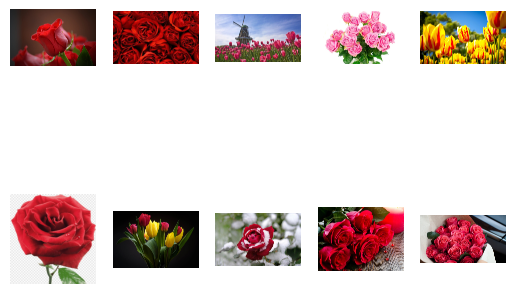

In [9]:
random_idx = np.random.randint(1,len(train_list),size=10)

fig = plt.figure()
i=1
for idx in random_idx:
    ax = fig.add_subplot(2,5,i)
    img = Image.open(train_list[idx])
    plt.imshow(img)
    i+=1
    plt.axis('off')


plt.show()

In [10]:
class dataset(torch.utils.data.Dataset):
    def __init__(self,file_list,transform=None):
        self.file_list = file_list
        self.transform = transform
        
    #dataset length
    def __len__(self):
        self.filelength = len(self.file_list)
        return self.filelength
    
    #load an one of images
    def __getitem__(self,idx):
        img_path = self.file_list[idx]
        img = Image.open(img_path)
        img_transformed = self.transform(img)
        
        label = img_path.split('\\')[-1].split('.')[0]
        if label == 'tulip':
            label=1
        elif label == 'rose':
            label=0
            
        return img_transformed,label

In [11]:
train_transforms =  transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ])

val_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ])

test_transforms = transforms.Compose([   
    transforms.Resize((224, 224)),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
    ])
train_data = dataset(train_list, transform=train_transforms)
test_data = dataset(test_list, transform=test_transforms)
val_data = dataset(val_list, transform=val_transforms)

In [12]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet,self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,16,kernel_size=3, padding=0,stride=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(16,32, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(32,64, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        
        self.fc1 = nn.Linear(3*3*64,10)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(10,2)
        self.relu = nn.ReLU()
        
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0),-1)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return out
    
model = ConvNet().to(device)
model.train()

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=576, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=10, out_features=2, bias=True)
 

Learning rate: 0.001, Batch size: 2
Epoch : 1, train accuracy : 0.6534083485603333, train loss : 0.614966630935669
Epoch : 1, val_accuracy : 0.6855667233467102, val_loss : 0.5863658785820007
Epoch : 2, train accuracy : 0.705807089805603, train loss : 0.5679717063903809
Epoch : 2, val_accuracy : 0.690721333026886, val_loss : 0.590814471244812
Epoch : 3, train accuracy : 0.7203271985054016, train loss : 0.5530517101287842
Epoch : 3, val_accuracy : 0.747422456741333, val_loss : 0.5240799188613892
Epoch : 4, train accuracy : 0.7140145897865295, train loss : 0.5529801249504089
Epoch : 4, val_accuracy : 0.7216490507125854, val_loss : 0.5062665343284607
Epoch : 5, train accuracy : 0.7310598492622375, train loss : 0.5189568996429443
Epoch : 5, val_accuracy : 0.7731955051422119, val_loss : 0.5393872857093811
Epoch : 6, train accuracy : 0.7386351823806763, train loss : 0.5088827013969421
Epoch : 6, val_accuracy : 0.7835047245025635, val_loss : 0.5078430771827698
Epoch : 7, train accuracy : 0.740

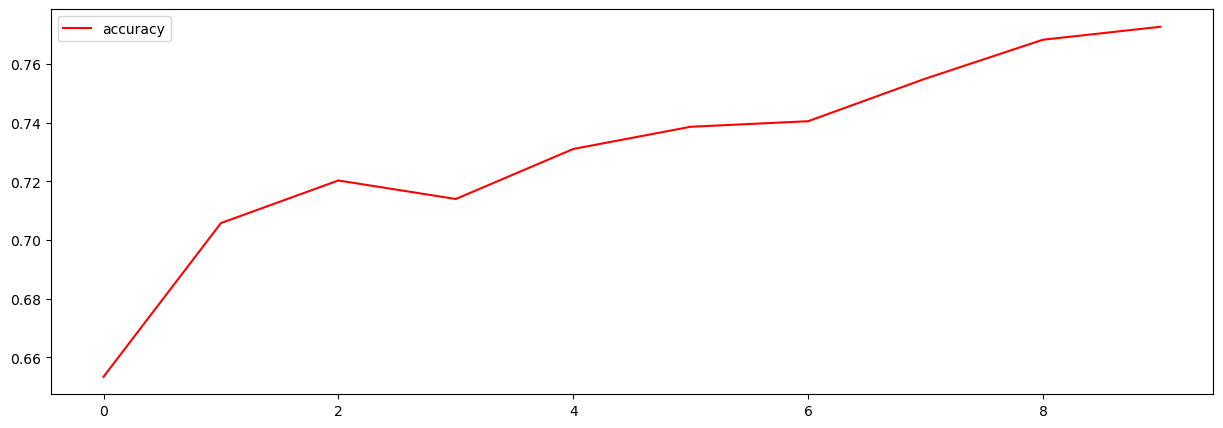

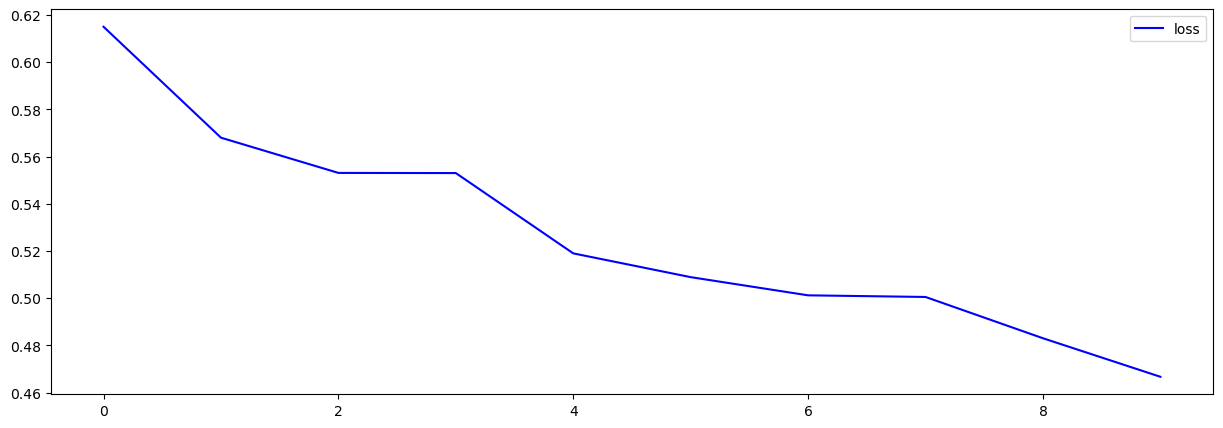

The graph for the validation sample


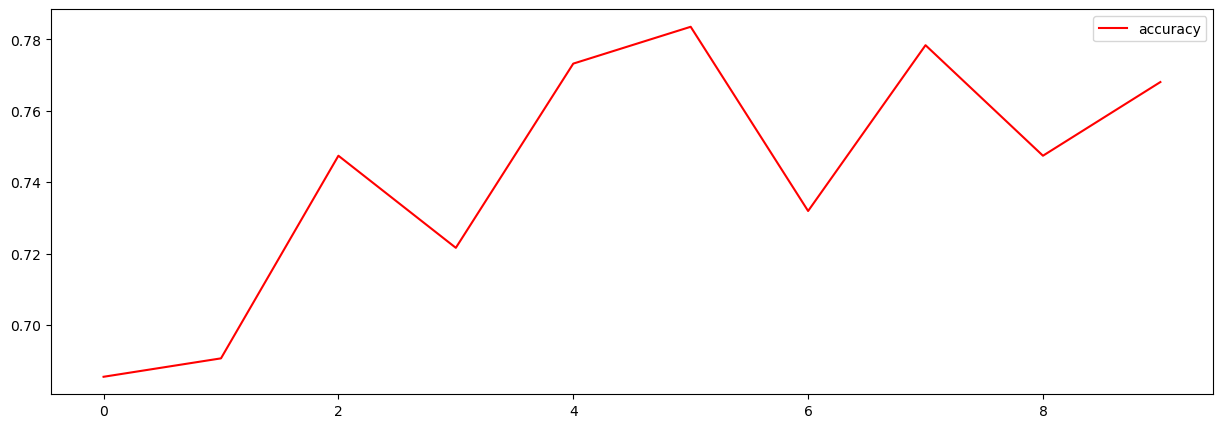

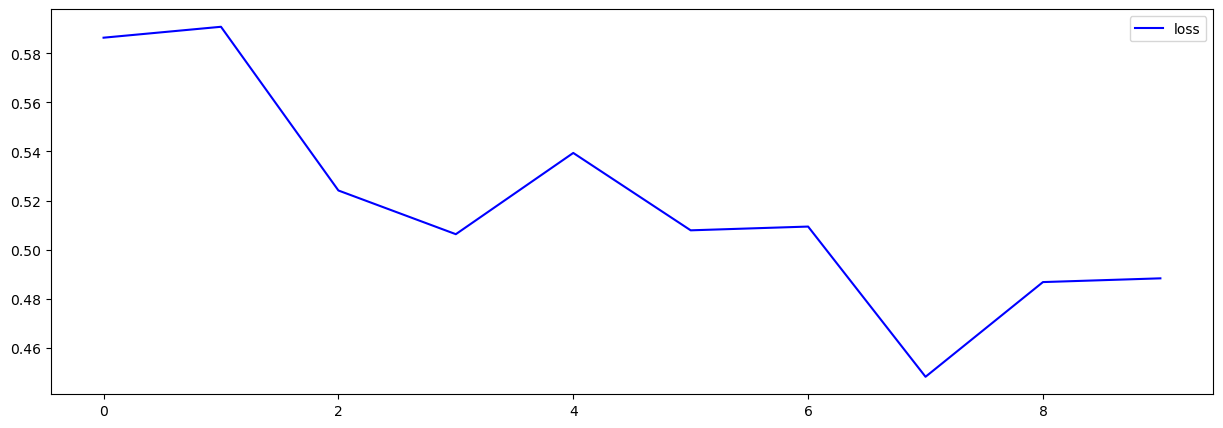

In [13]:
print('Learning rate: 0.001, Batch size: 2')

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=2, shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=2, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=2, shuffle=True)

epochs = 10
def train_loop (train_loader, val_loader, epochs):
    val_loss_list = []
    val_accuracy_list = []

    loss_list = []
    accuracy_list = []

    for epoch in range(epochs):
        epoch_loss = 0
        epoch_accuracy = 0
        for data, label in train_loader:
            data = data.to(device)
            label = label.to(device)

            output = model(data)
            loss = criterion(output, label)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            acc = ((output.argmax(dim=1) == label).float().mean())
            epoch_accuracy += acc/len(train_loader)
            epoch_loss += loss/len(train_loader)

        loss_list.append(epoch_loss.item())
        accuracy_list.append(epoch_accuracy.item())

        print('Epoch : {}, train accuracy : {}, train loss : {}'.format(epoch+1, epoch_accuracy,epoch_loss))


        with torch.no_grad():
            epoch_val_accuracy=0
            epoch_val_loss =0
            
            for data, label in val_loader:
                data = data.to(device)
                label = label.to(device)

                val_output = model(data)
                val_loss = criterion(val_output,label)

                acc = ((val_output.argmax(dim=1) == label).float().mean())
                epoch_val_accuracy += acc/ len(val_loader)
                epoch_val_loss += val_loss/ len(val_loader)


            val_loss_list.append(epoch_val_loss.item())
            val_accuracy_list.append(epoch_val_accuracy.item())

            print('Epoch : {}, val_accuracy : {}, val_loss : {}'.format(epoch+1, epoch_val_accuracy,epoch_val_loss))


    print("\nThe graph for the training sample")

    plt.figure(figsize=(15, 5))
    plt.plot(range(10), accuracy_list, color="red")
    plt.legend(["accuracy"])
    plt.show()

    plt.figure(figsize=(15, 5))
    plt.plot(range(10), loss_list, color="blue")
    plt.legend(["loss"])
    plt.show() 

    print("The graph for the validation sample")

    plt.figure(figsize=(15, 5))
    plt.plot(range(10), val_accuracy_list, color="red")
    plt.legend(["accuracy"])
    plt.show()

    plt.figure(figsize=(15, 5))
    plt.plot(range(10), val_loss_list, color="blue")
    plt.legend(["loss"])
    plt.show() 

train_loop(train_loader, val_loader, epochs)

Learning rate: 0.001, Batch size: 16
Epoch : 1, train accuracy : 0.8212538957595825, train loss : 0.3839718699455261
Epoch : 1, val_accuracy : 0.8557692170143127, val_loss : 0.3329731822013855
Epoch : 2, train accuracy : 0.8344274759292603, train loss : 0.36648598313331604
Epoch : 2, val_accuracy : 0.7980769276618958, val_loss : 0.44956594705581665
Epoch : 3, train accuracy : 0.8427186608314514, train loss : 0.3455638885498047
Epoch : 3, val_accuracy : 0.7788461446762085, val_loss : 0.44335517287254333
Epoch : 4, train accuracy : 0.8465064764022827, train loss : 0.33318692445755005
Epoch : 4, val_accuracy : 0.870192289352417, val_loss : 0.3238113224506378
Epoch : 5, train accuracy : 0.8508415818214417, train loss : 0.3386647701263428
Epoch : 5, val_accuracy : 0.7740384936332703, val_loss : 0.5024657845497131
Epoch : 6, train accuracy : 0.8572387099266052, train loss : 0.3167808949947357
Epoch : 6, val_accuracy : 0.9038462042808533, val_loss : 0.27514582872390747
Epoch : 7, train accura

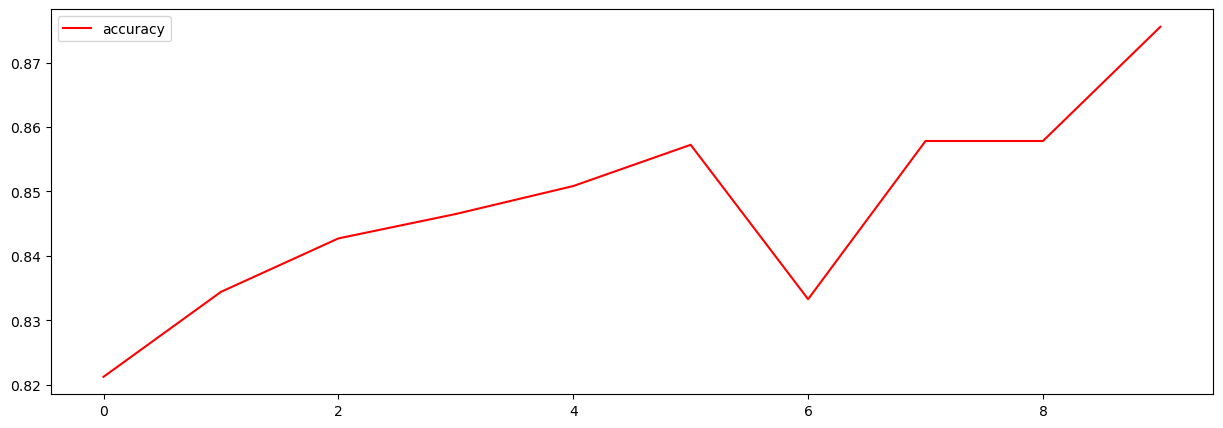

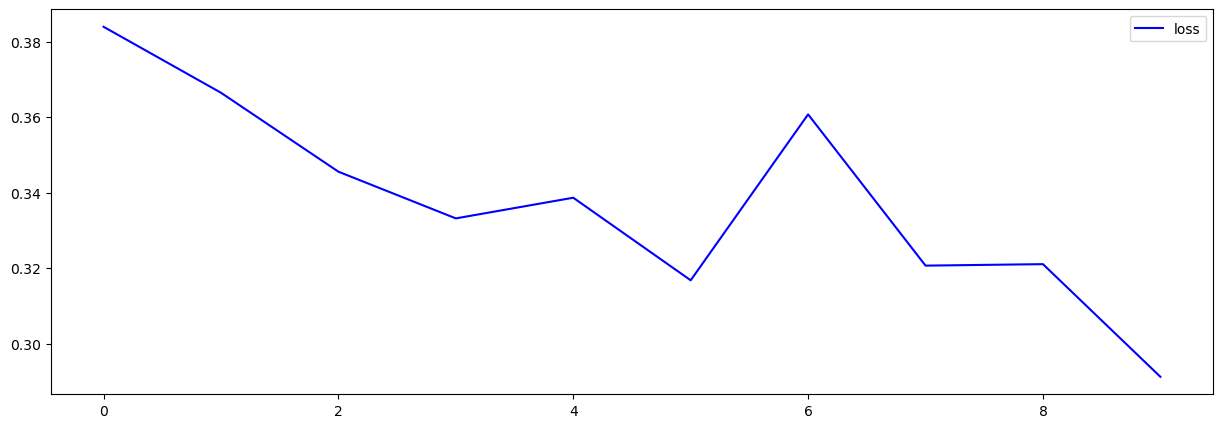

The graph for the validation sample


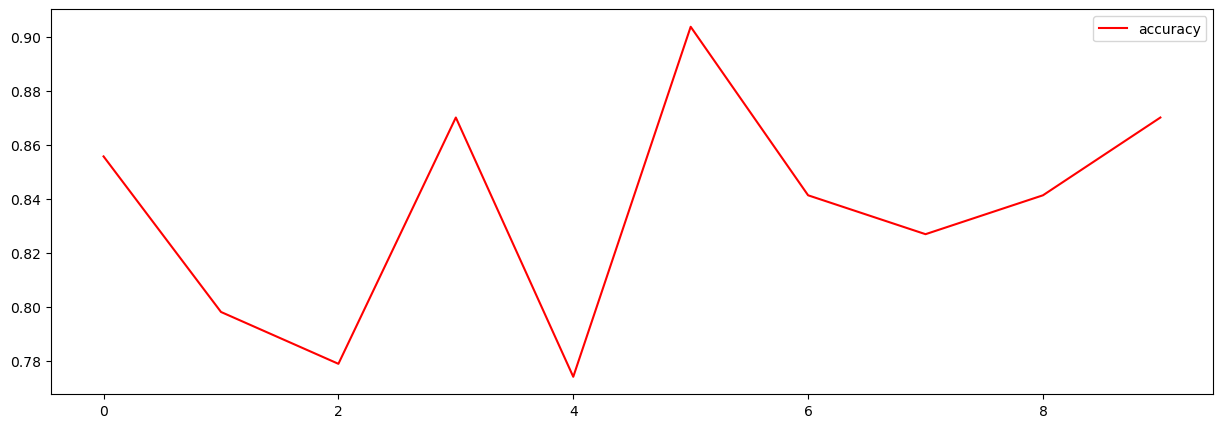

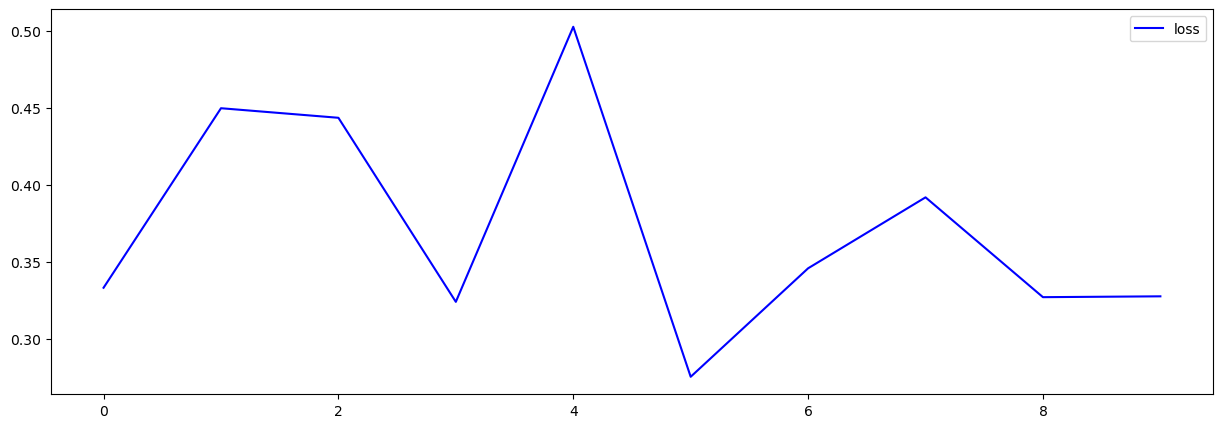

In [19]:
print('Learning rate: 0.001, Batch size: 16')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=16, shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=16, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=16, shuffle=True)

train_loop(train_loader, val_loader, epochs)

Learning rate: 0.001, Batch size: 64
Epoch : 1, train accuracy : 0.8596675992012024, train loss : 0.2986091375350952
Epoch : 1, val_accuracy : 0.91796875, val_loss : 0.23855143785476685
Epoch : 2, train accuracy : 0.8826197385787964, train loss : 0.27804726362228394
Epoch : 2, val_accuracy : 0.91796875, val_loss : 0.2858162224292755
Epoch : 3, train accuracy : 0.8802394270896912, train loss : 0.27285683155059814
Epoch : 3, val_accuracy : 0.86328125, val_loss : 0.24747541546821594
Epoch : 4, train accuracy : 0.8688165545463562, train loss : 0.2928331792354584
Epoch : 4, val_accuracy : 0.8828125, val_loss : 0.24110665917396545
Epoch : 5, train accuracy : 0.8773935437202454, train loss : 0.2706020474433899
Epoch : 5, val_accuracy : 0.9296875, val_loss : 0.1831599324941635
Epoch : 6, train accuracy : 0.8811967968940735, train loss : 0.2840856909751892
Epoch : 6, val_accuracy : 0.92578125, val_loss : 0.30127236247062683
Epoch : 7, train accuracy : 0.8836436867713928, train loss : 0.26433476

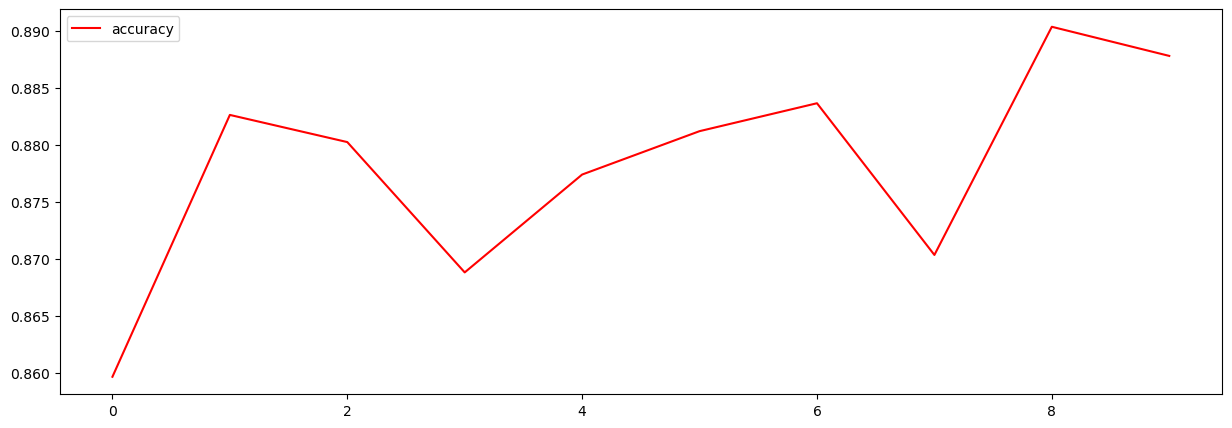

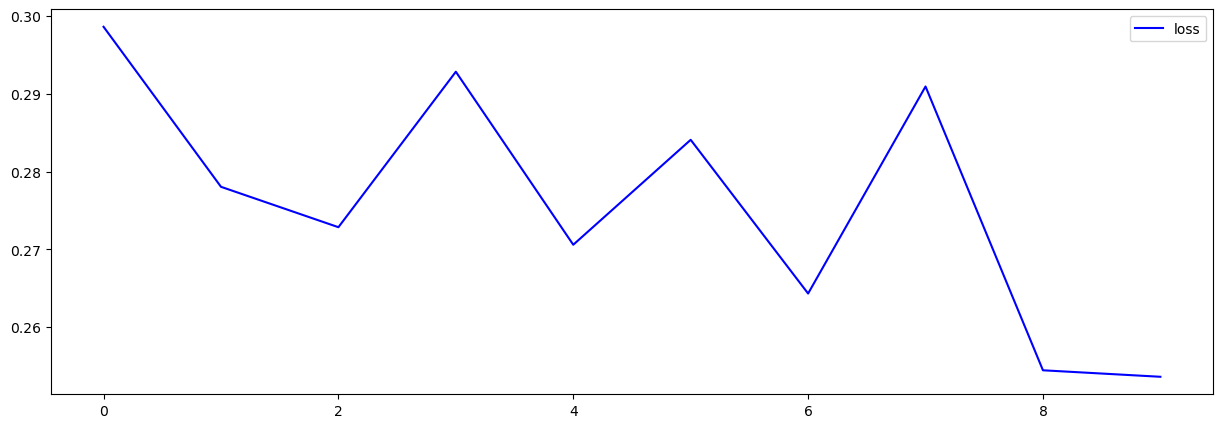

The graph for the validation sample


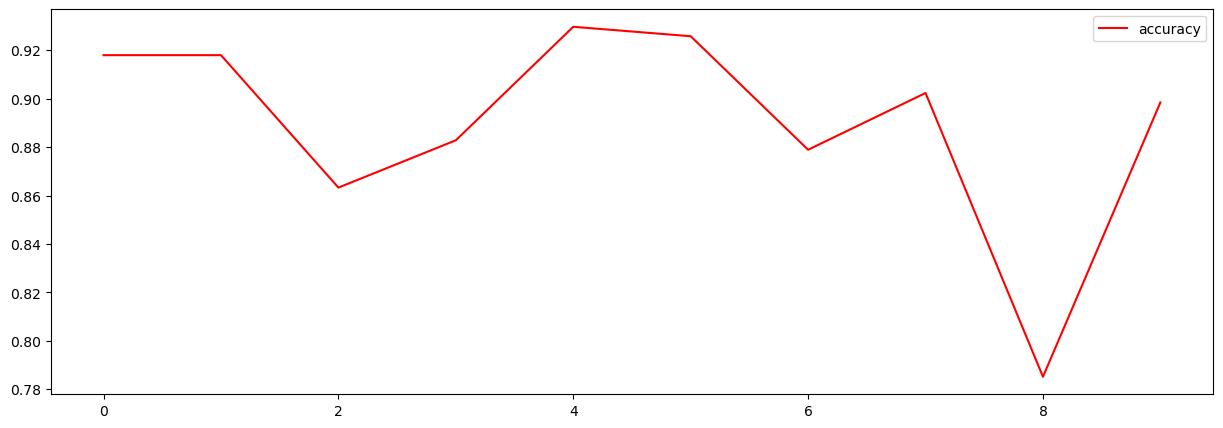

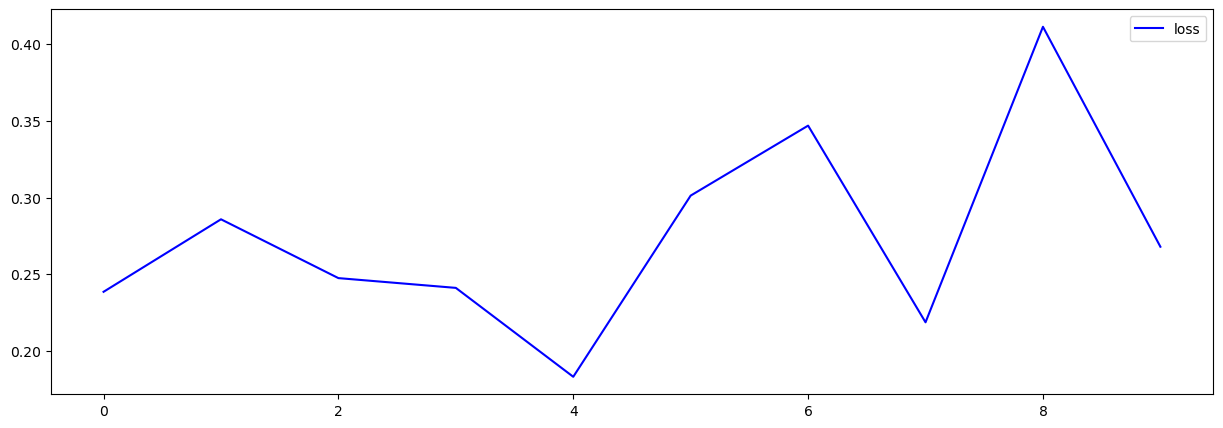

In [20]:
print('Learning rate: 0.001, Batch size: 64')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=64, shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=64, shuffle=True)

train_loop(train_loader, val_loader, epochs)

Learning rate: 0.01, Batch size: 2
Epoch : 1, train accuracy : 0.4734833836555481, train loss : 0.7007206678390503
Epoch : 1, val_accuracy : 0.41237112879753113, val_loss : 0.6957663297653198
Epoch : 2, train accuracy : 0.47285228967666626, train loss : 0.6955820322036743
Epoch : 2, val_accuracy : 0.5876286625862122, val_loss : 0.692867636680603
Epoch : 3, train accuracy : 0.4936854839324951, train loss : 0.6949607133865356
Epoch : 3, val_accuracy : 0.5876286625862122, val_loss : 0.6910820007324219
Epoch : 4, train accuracy : 0.5069433450698853, train loss : 0.6948488354682922
Epoch : 4, val_accuracy : 0.41237112879753113, val_loss : 0.709377110004425
Epoch : 5, train accuracy : 0.4905291199684143, train loss : 0.6947782039642334
Epoch : 5, val_accuracy : 0.5876287221908569, val_loss : 0.6895173788070679
Epoch : 6, train accuracy : 0.5037872195243835, train loss : 0.695332407951355
Epoch : 6, val_accuracy : 0.41237112879753113, val_loss : 0.696952223777771
Epoch : 7, train accuracy : 0

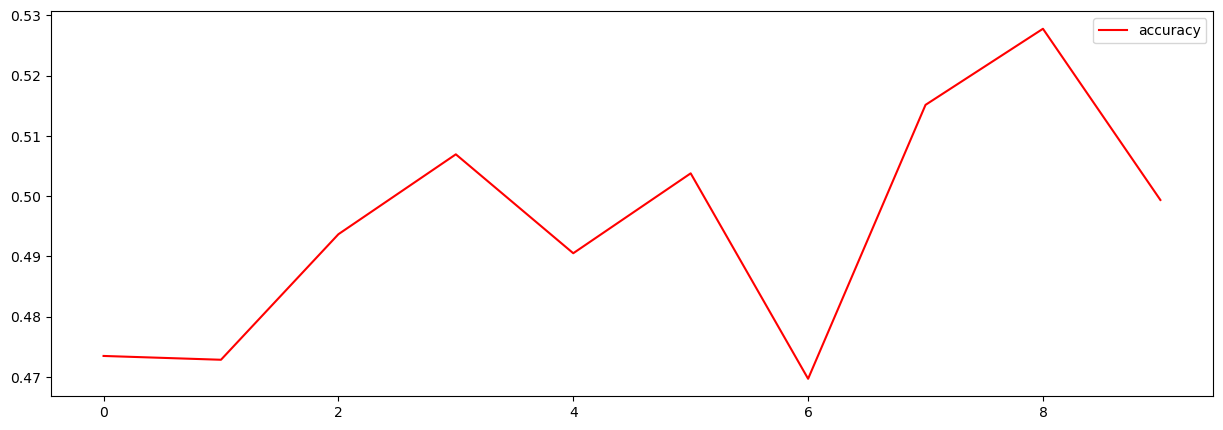

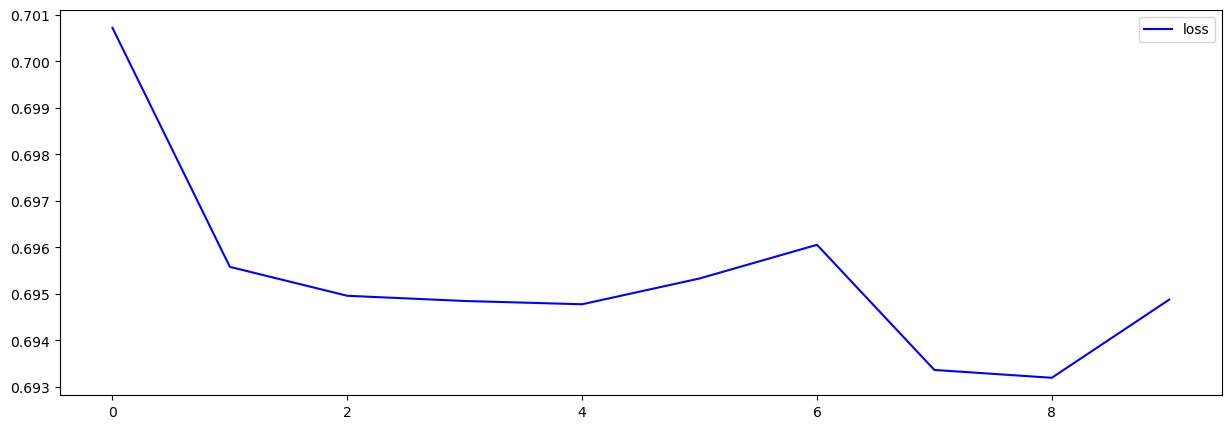

The graph for the validation sample


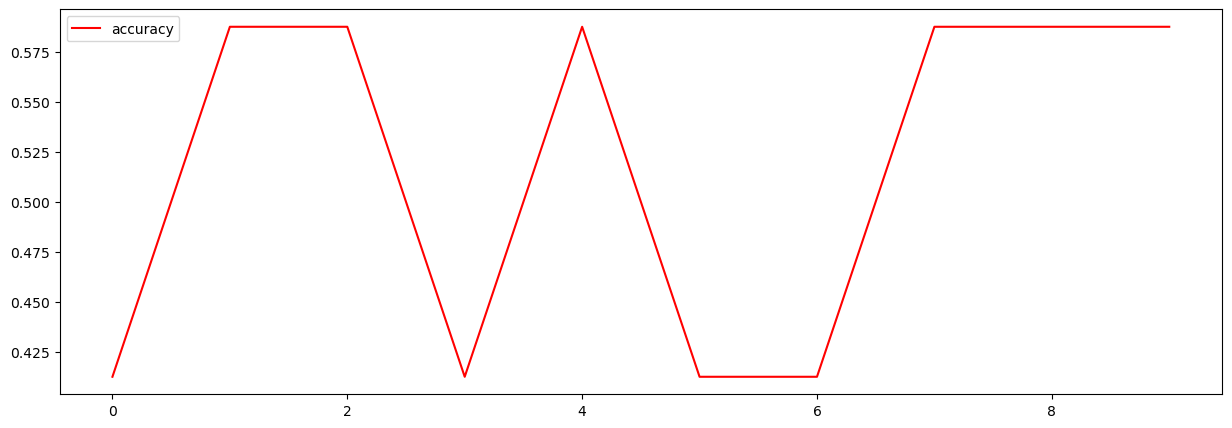

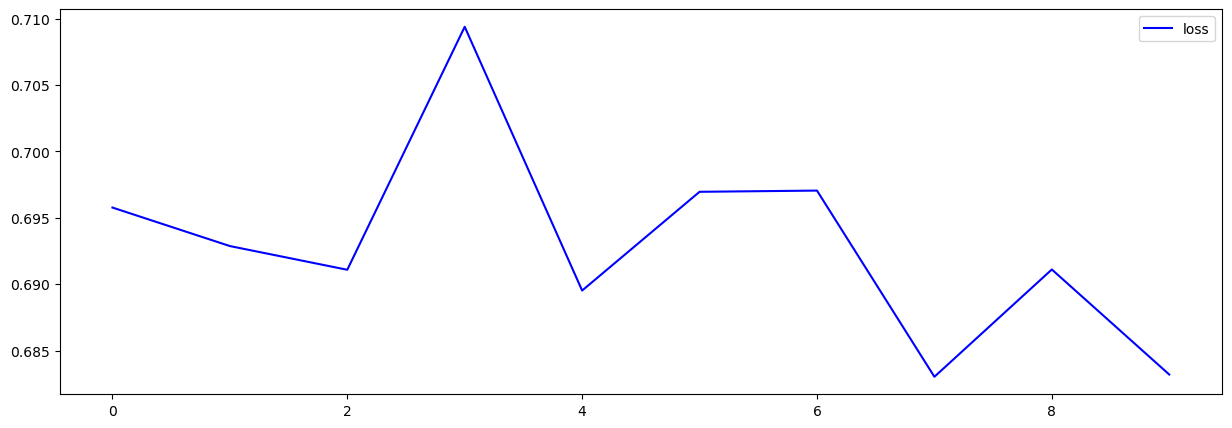

In [21]:
print('Learning rate: 0.01, Batch size: 2')
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=2, shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=2, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=2, shuffle=True)

train_loop(train_loader, val_loader, epochs)

Learning rate: 0.01, Batch size: 16
Epoch : 1, train accuracy : 0.48648983240127563, train loss : 0.6947820782661438
Epoch : 1, val_accuracy : 0.384615421295166, val_loss : 0.6998077034950256
Epoch : 2, train accuracy : 0.4964646100997925, train loss : 0.6938784718513489
Epoch : 2, val_accuracy : 0.38461539149284363, val_loss : 0.7021676301956177
Epoch : 3, train accuracy : 0.49903202056884766, train loss : 0.6932584643363953
Epoch : 3, val_accuracy : 0.384615421295166, val_loss : 0.6984017491340637
Epoch : 4, train accuracy : 0.4966331422328949, train loss : 0.6936950087547302
Epoch : 4, val_accuracy : 0.38461536169052124, val_loss : 0.7050847411155701
Epoch : 5, train accuracy : 0.5055133700370789, train loss : 0.6936626434326172
Epoch : 5, val_accuracy : 0.384615421295166, val_loss : 0.6975963115692139
Epoch : 6, train accuracy : 0.5090067386627197, train loss : 0.6939123868942261
Epoch : 6, val_accuracy : 0.41826921701431274, val_loss : 0.6963405609130859
Epoch : 7, train accuracy 

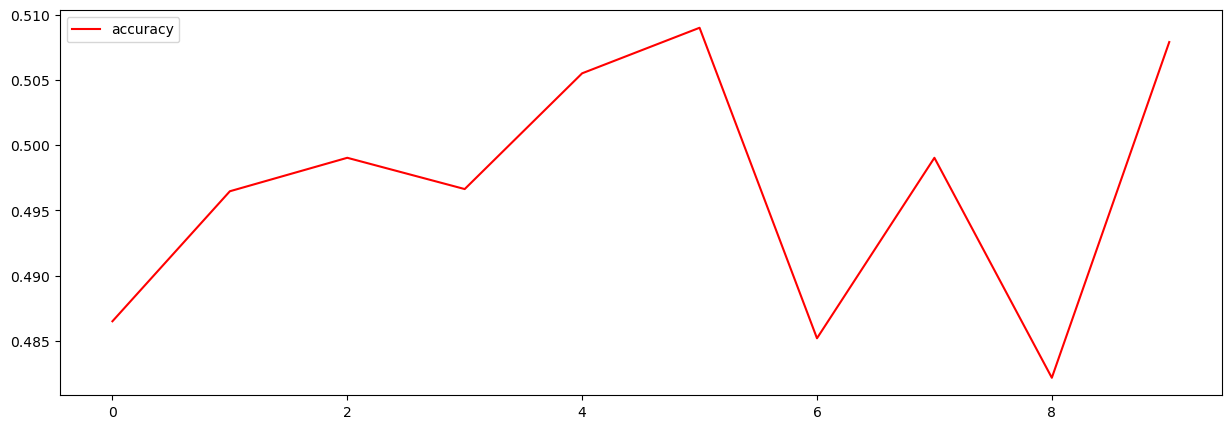

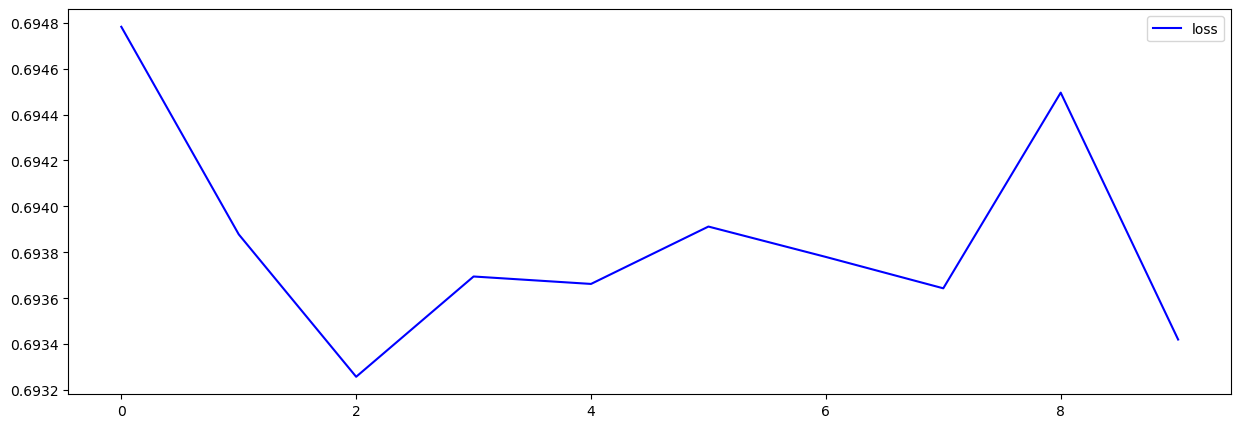

The graph for the validation sample


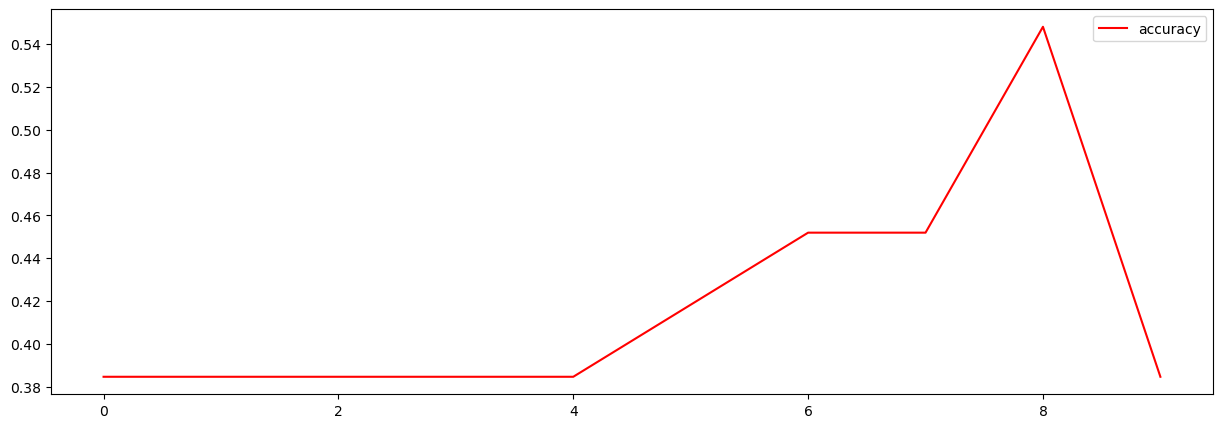

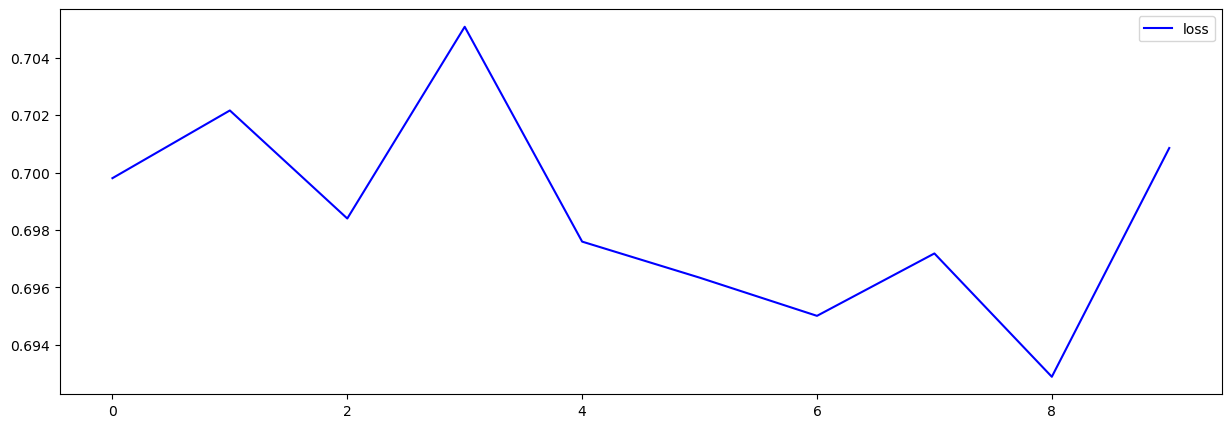

In [22]:
print('Learning rate: 0.01, Batch size: 16')
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=16, shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=16, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=16, shuffle=True)

train_loop(train_loader, val_loader, epochs)

Learning rate: 0.01, Batch size: 64
Epoch : 1, train accuracy : 0.5096276998519897, train loss : 0.6937892436981201
Epoch : 1, val_accuracy : 0.3125, val_loss : 0.701667070388794
Epoch : 2, train accuracy : 0.46940162777900696, train loss : 0.6939643025398254
Epoch : 2, val_accuracy : 0.4375, val_loss : 0.6951742768287659
Epoch : 3, train accuracy : 0.5087234377861023, train loss : 0.6931605339050293
Epoch : 3, val_accuracy : 0.3125, val_loss : 0.7006518840789795
Epoch : 4, train accuracy : 0.5096276998519897, train loss : 0.6932291388511658
Epoch : 4, val_accuracy : 0.3125, val_loss : 0.6987000107765198
Epoch : 5, train accuracy : 0.5080452561378479, train loss : 0.6933660507202148
Epoch : 5, val_accuracy : 0.3125, val_loss : 0.7062166929244995
Epoch : 6, train accuracy : 0.5091755390167236, train loss : 0.6934738755226135
Epoch : 6, val_accuracy : 0.43359375, val_loss : 0.6961988806724548
Epoch : 7, train accuracy : 0.5991224050521851, train loss : 0.6656709909439087
Epoch : 7, val_a

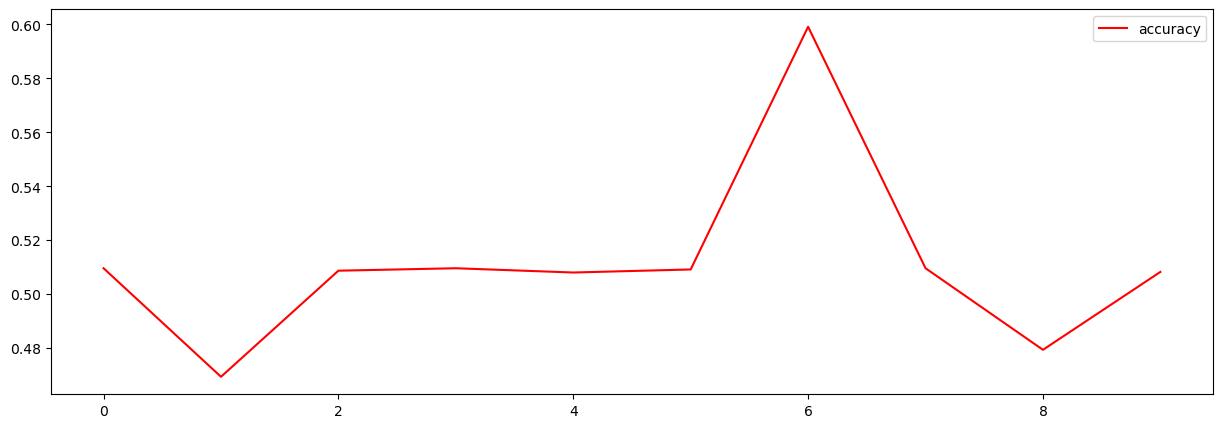

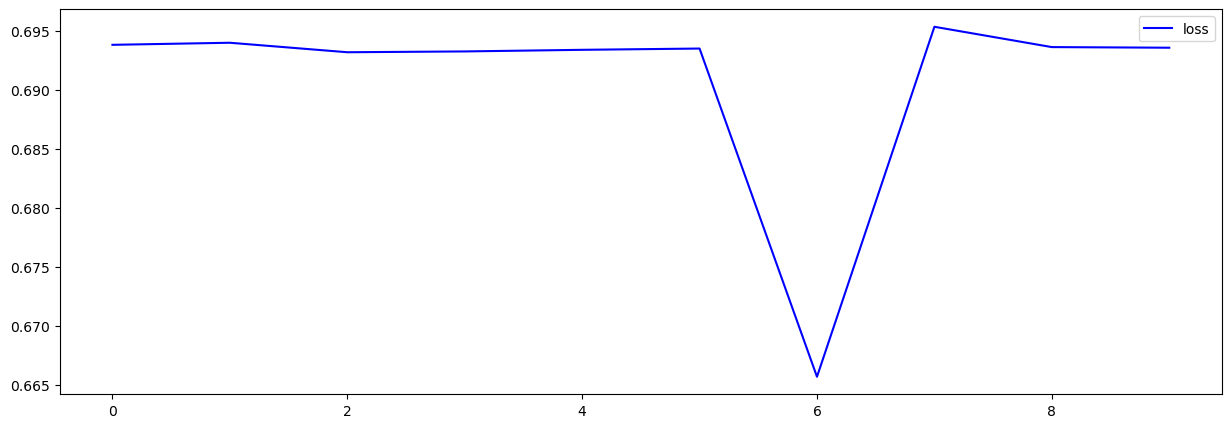

The graph for the validation sample


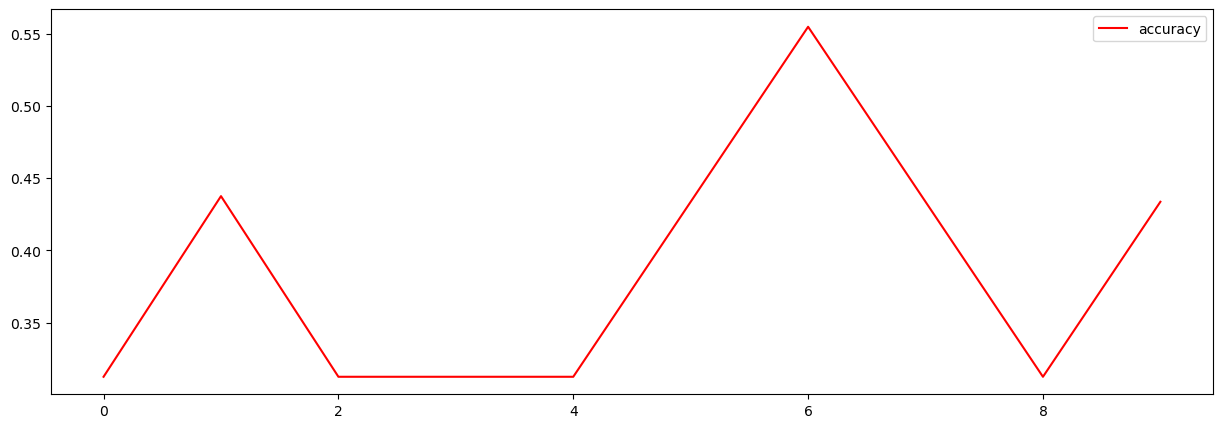

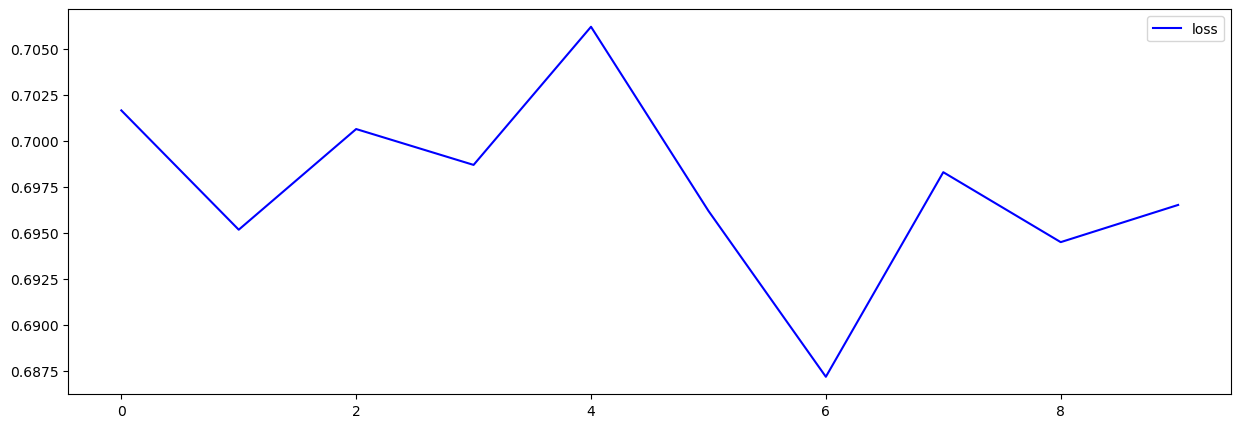

In [23]:
print('Learning rate: 0.01, Batch size: 64')
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=64, shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=64, shuffle=True)

train_loop(train_loader, val_loader, epochs)

Learning rate: 0.1, Batch size: 2
Epoch : 1, train accuracy : 0.4911603033542633, train loss : 0.7106955051422119
Epoch : 1, val_accuracy : 0.41237112879753113, val_loss : 0.7266318798065186
Epoch : 2, train accuracy : 0.490529328584671, train loss : 0.7110525369644165
Epoch : 2, val_accuracy : 0.41237112879753113, val_loss : 0.7993998527526855
Epoch : 3, train accuracy : 0.5113625526428223, train loss : 0.7060810923576355
Epoch : 3, val_accuracy : 0.41237112879753113, val_loss : 0.7251752614974976
Epoch : 4, train accuracy : 0.47853395342826843, train loss : 0.7163763046264648
Epoch : 4, val_accuracy : 0.41237112879753113, val_loss : 0.6954180002212524
Epoch : 5, train accuracy : 0.5202010273933411, train loss : 0.7034581899642944
Epoch : 5, val_accuracy : 0.5876287817955017, val_loss : 0.7256559729576111
Epoch : 6, train accuracy : 0.501892626285553, train loss : 0.7152215838432312
Epoch : 6, val_accuracy : 0.41237112879753113, val_loss : 0.6943259239196777
Epoch : 7, train accuracy 

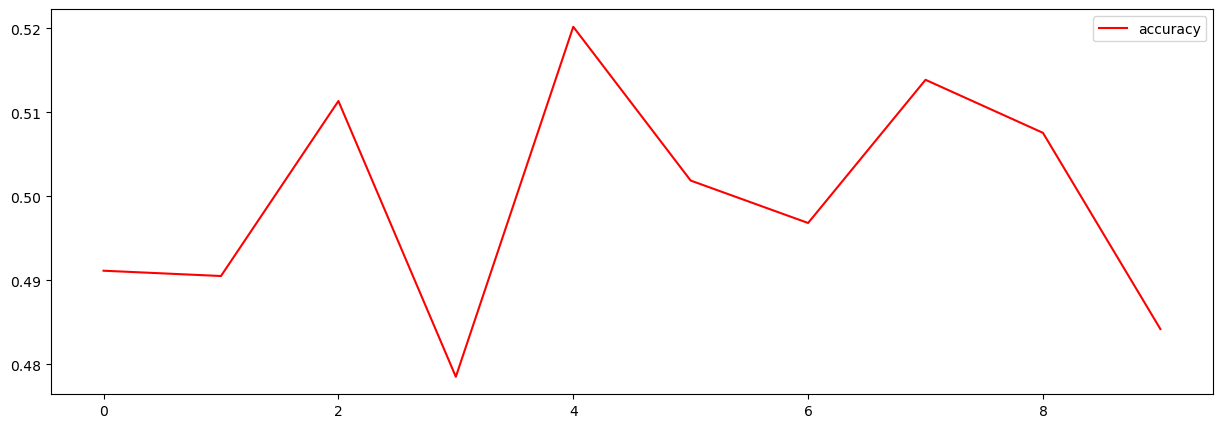

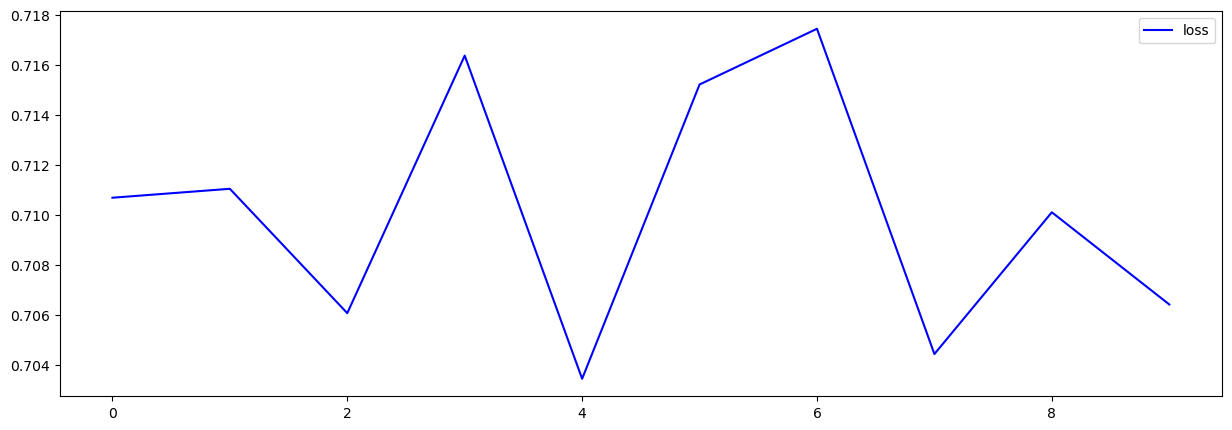

The graph for the validation sample


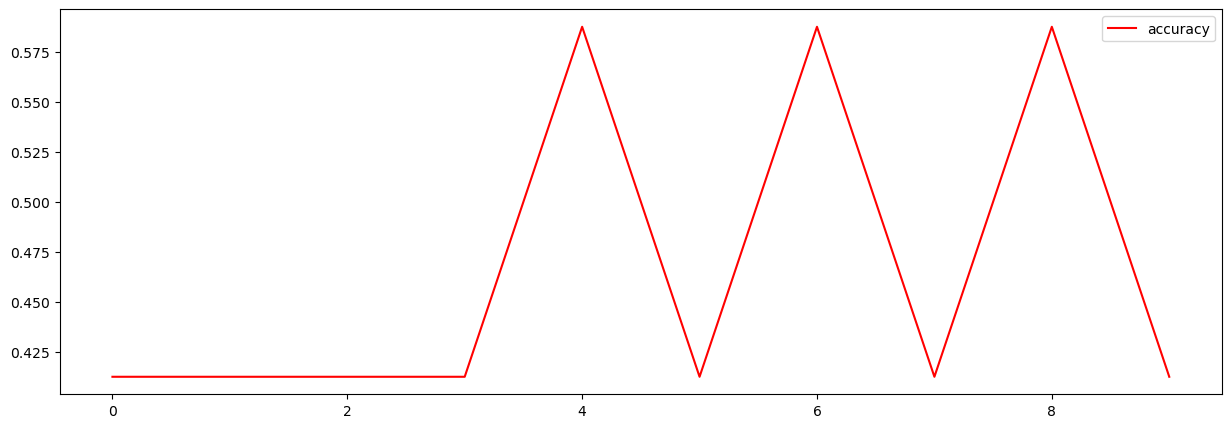

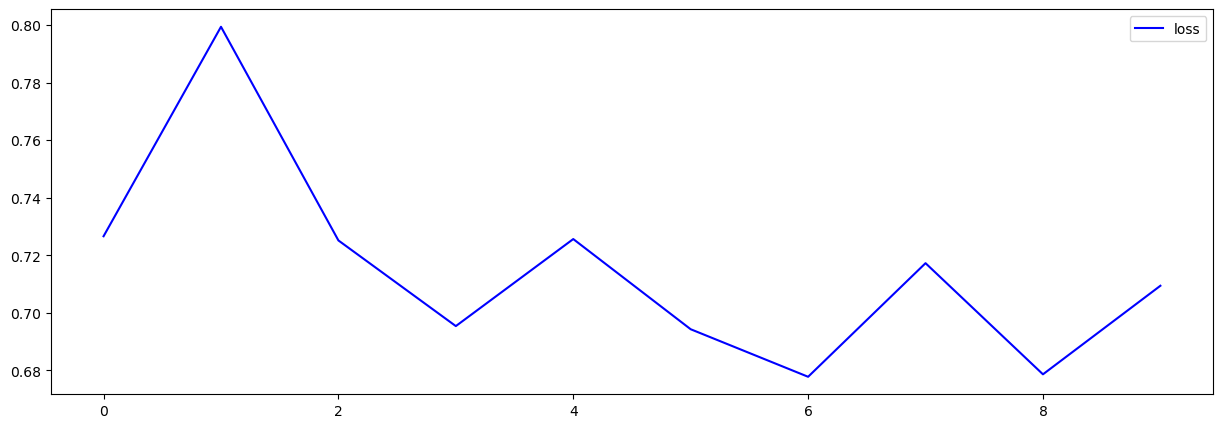

In [24]:
print('Learning rate: 0.1, Batch size: 2')
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=2, shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=2, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=2, shuffle=True)

train_loop(train_loader, val_loader, epochs)

Learning rate: 0.1, Batch size: 16
Epoch : 1, train accuracy : 0.48686861991882324, train loss : 0.701130747795105
Epoch : 1, val_accuracy : 0.41826924681663513, val_loss : 0.6938181519508362
Epoch : 2, train accuracy : 0.49452856183052063, train loss : 0.7021107077598572
Epoch : 2, val_accuracy : 0.5817307829856873, val_loss : 0.6808016300201416
Epoch : 3, train accuracy : 0.5161615610122681, train loss : 0.6990787386894226
Epoch : 3, val_accuracy : 0.5817307829856873, val_loss : 0.6828758120536804
Epoch : 4, train accuracy : 0.49785348773002625, train loss : 0.6990755200386047
Epoch : 4, val_accuracy : 0.38461536169052124, val_loss : 0.7499734163284302
Epoch : 5, train accuracy : 0.5022305846214294, train loss : 0.696038007736206
Epoch : 5, val_accuracy : 0.6153846383094788, val_loss : 0.6871496438980103
Epoch : 6, train accuracy : 0.5085858702659607, train loss : 0.6976916193962097
Epoch : 6, val_accuracy : 0.5817307829856873, val_loss : 0.6882425546646118
Epoch : 7, train accuracy 

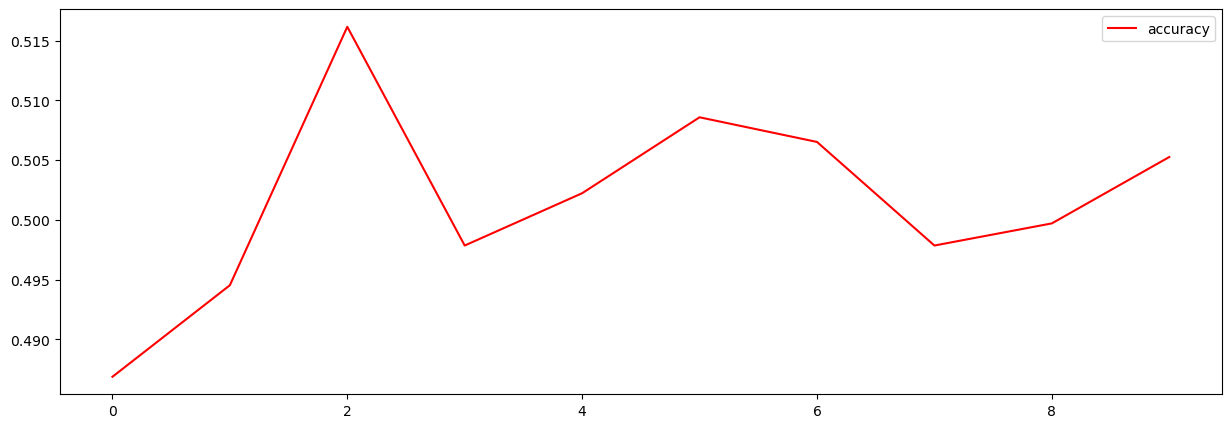

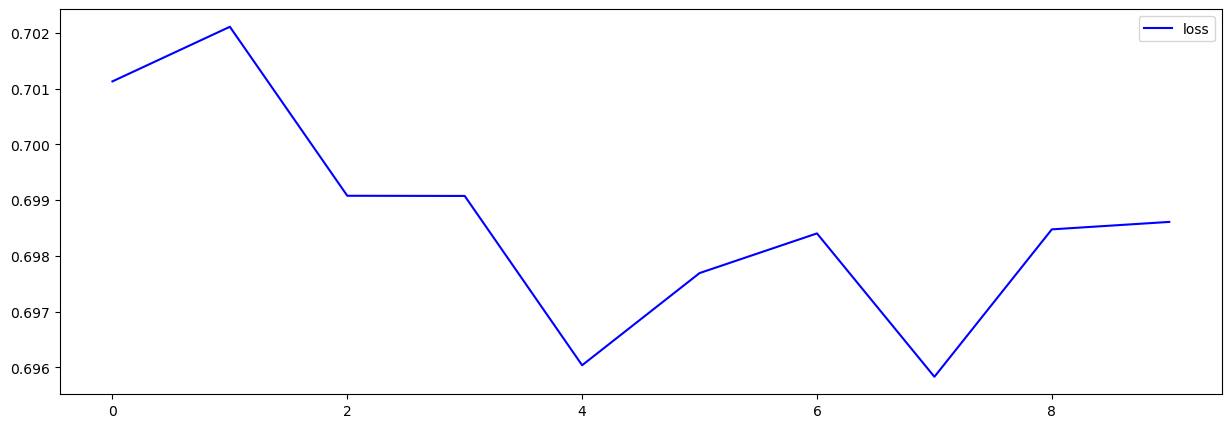

The graph for the validation sample


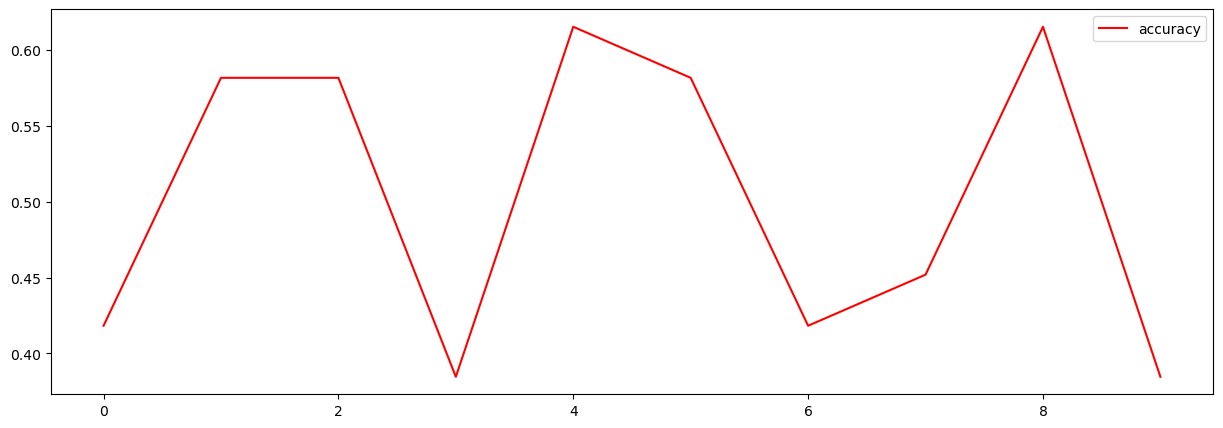

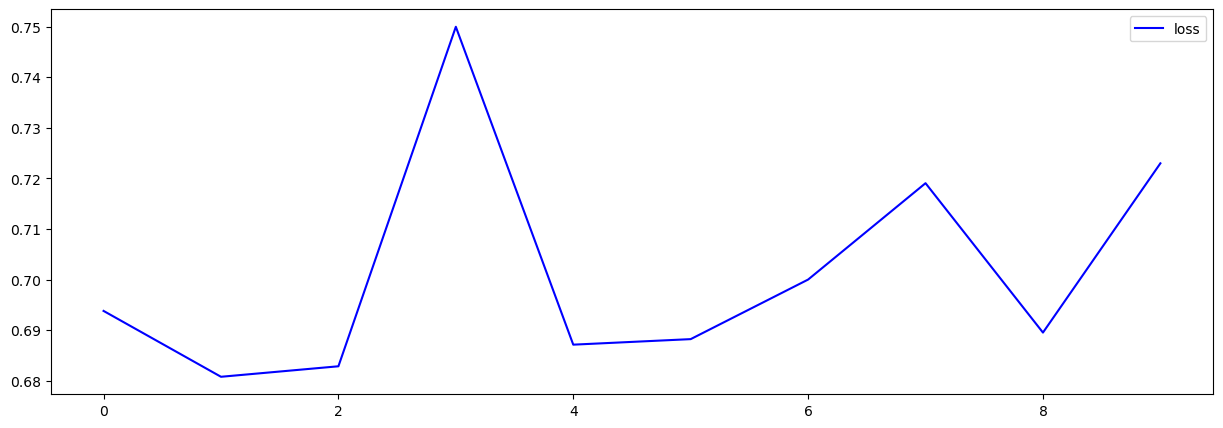

In [25]:
print('Learning rate: 0.1, Batch size: 16')
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=16, shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=16, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=16, shuffle=True)

train_loop(train_loader, val_loader, epochs)

Learning rate: 0.1, Batch size: 64
Epoch : 1, train accuracy : 0.49155592918395996, train loss : 0.6951732039451599
Epoch : 1, val_accuracy : 0.3125, val_loss : 0.7055505514144897
Epoch : 2, train accuracy : 0.4958777129650116, train loss : 0.6951994299888611
Epoch : 2, val_accuracy : 0.3125, val_loss : 0.75072181224823
Epoch : 3, train accuracy : 0.5041755437850952, train loss : 0.6982288360595703
Epoch : 3, val_accuracy : 0.5546875, val_loss : 0.6876412630081177
Epoch : 4, train accuracy : 0.5112766027450562, train loss : 0.6942844390869141
Epoch : 4, val_accuracy : 0.6875, val_loss : 0.6756529808044434
Epoch : 5, train accuracy : 0.5122473239898682, train loss : 0.6961072087287903
Epoch : 5, val_accuracy : 0.3125, val_loss : 0.7126331329345703
Epoch : 6, train accuracy : 0.49417558312416077, train loss : 0.6963204145431519
Epoch : 6, val_accuracy : 0.5546875, val_loss : 0.6915575265884399
Epoch : 7, train accuracy : 0.4891755282878876, train loss : 0.6944890022277832
Epoch : 7, val_

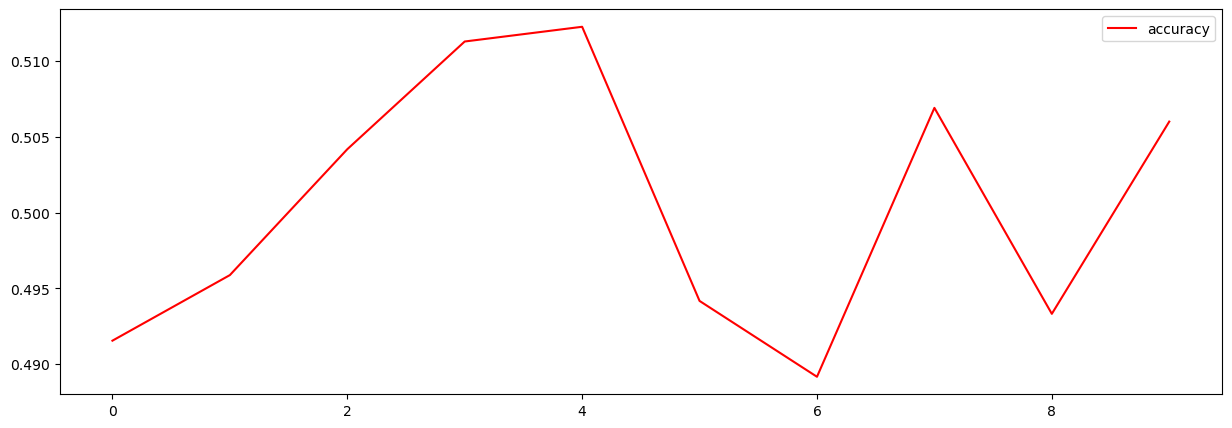

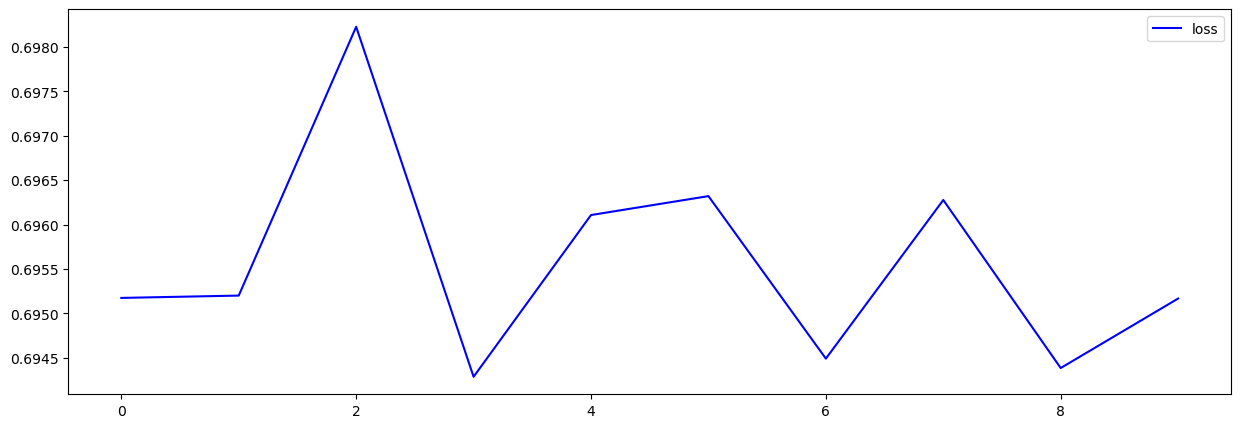

The graph for the validation sample


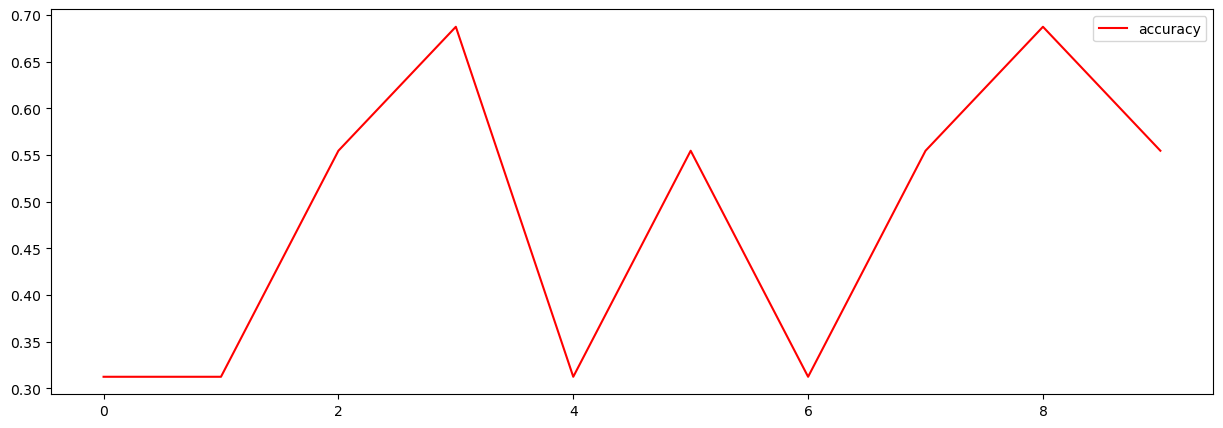

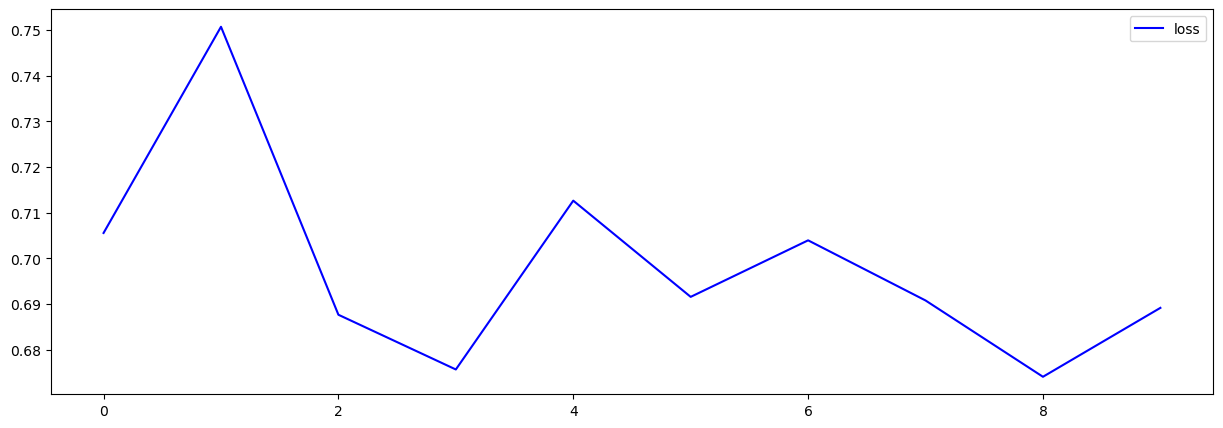

In [26]:
print('Learning rate: 0.1, Batch size: 64')
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=64, shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=64, shuffle=True)

train_loop(train_loader, val_loader, epochs)

Learning rate: 0.001, Batch size: 2
Epoch : 1, train accuracy : 0.4955797493457794, train loss : 0.6931803822517395
Epoch : 1, val_accuracy : 0.41237112879753113, val_loss : 0.6980518698692322
Epoch : 2, train accuracy : 0.5094683170318604, train loss : 0.6932346224784851
Epoch : 2, val_accuracy : 0.41237112879753113, val_loss : 0.696191132068634
Epoch : 3, train accuracy : 0.5088371634483337, train loss : 0.6932765245437622
Epoch : 3, val_accuracy : 0.41237112879753113, val_loss : 0.6966201663017273
Epoch : 4, train accuracy : 0.5088372230529785, train loss : 0.6932416558265686
Epoch : 4, val_accuracy : 0.41237112879753113, val_loss : 0.6956656575202942
Epoch : 5, train accuracy : 0.5088371634483337, train loss : 0.6932536363601685
Epoch : 5, val_accuracy : 0.41237112879753113, val_loss : 0.6945964694023132
Epoch : 6, train accuracy : 0.5088375806808472, train loss : 0.6933153867721558
Epoch : 6, val_accuracy : 0.41237112879753113, val_loss : 0.6952981948852539
Epoch : 7, train accura

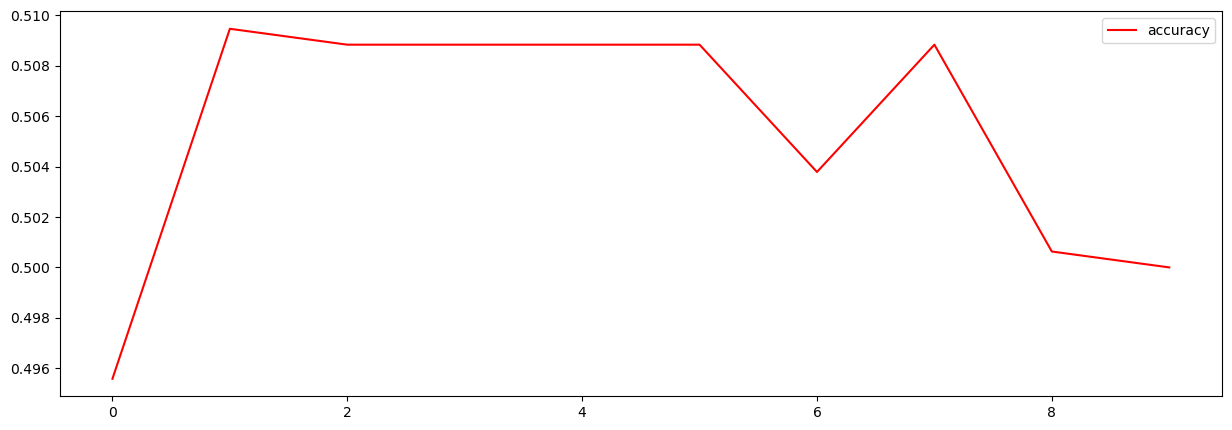

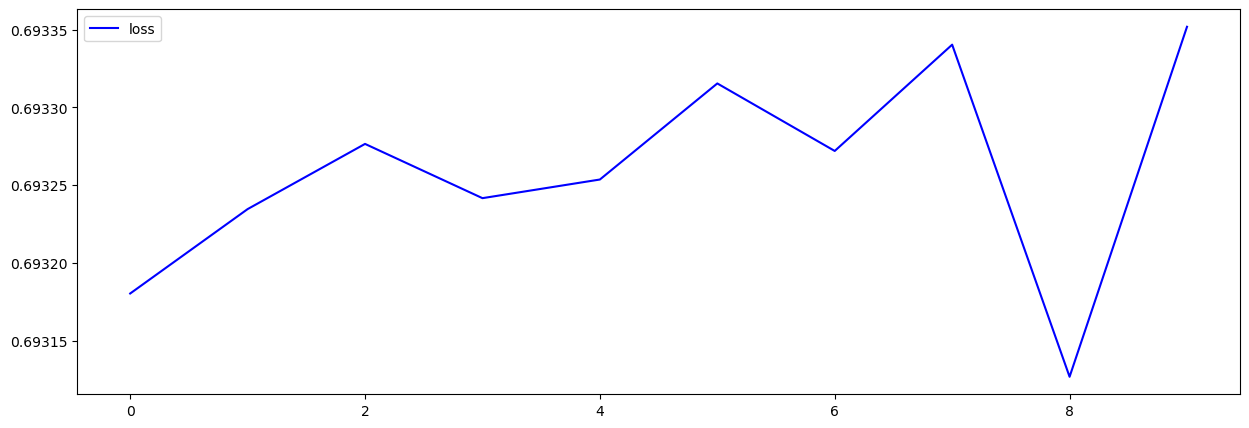

The graph for the validation sample


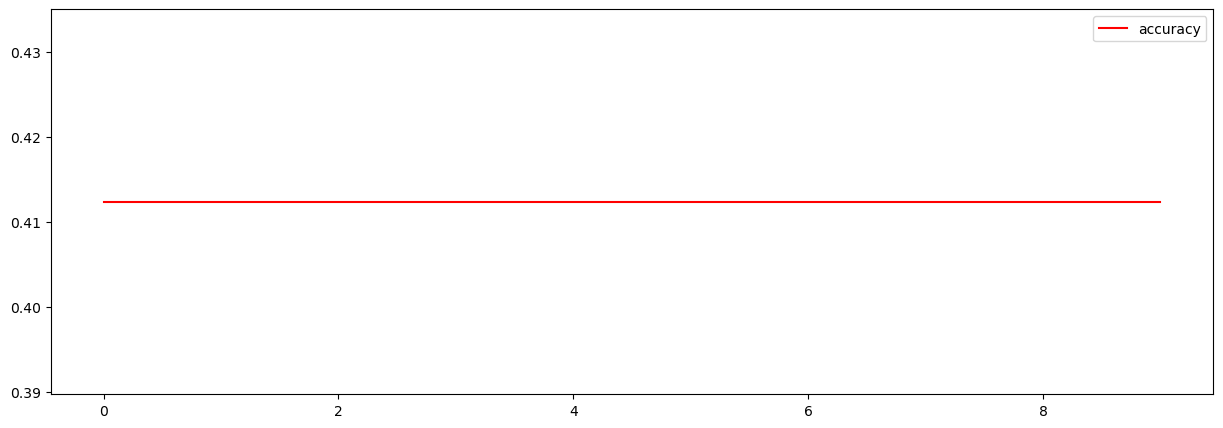

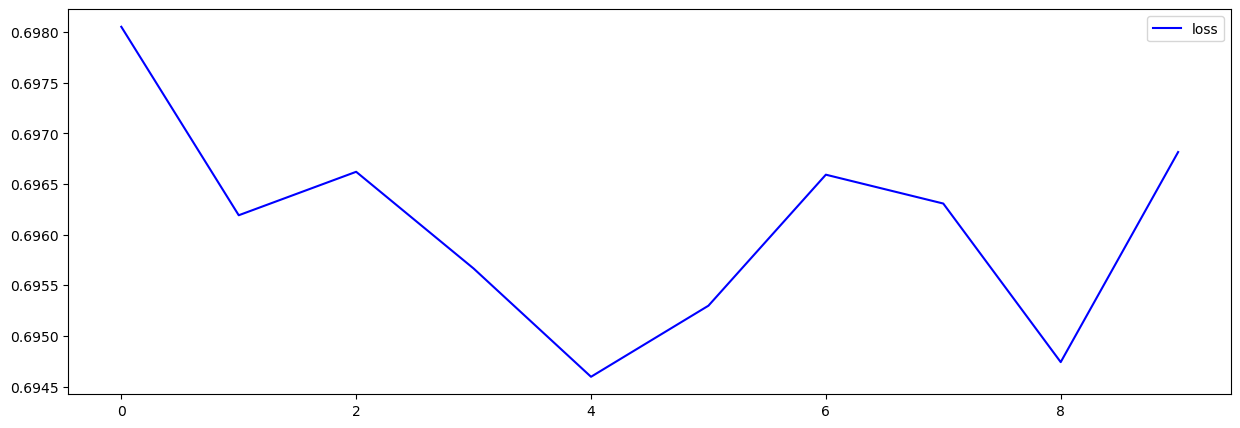

In [35]:
print('Learning rate: 0.001, Batch size: 2')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=2, shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=2, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=2, shuffle=True)

train_loop(train_loader, val_loader, epochs)

In [36]:
rose_probs = []
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        preds = model(images)
        preds_list = F.softmax(preds, dim=1)[:, 1].tolist()
        rose_probs += list(zip(labels, preds_list))

rose_probs.sort(key = lambda x : int(x[0]))     
idx = list(map(lambda x: x[0],rose_probs))
prob = list(map(lambda x: x[1],rose_probs))

submission = pd.DataFrame({'id':idx,'label':prob})

submission

,id,label
0,1583,0.509905
1,1584,0.509905
2,1585,0.509905
3,1586,0.509905
4,1587,0.509905
...,...,...
220,1803,0.509905
221,1804,0.509905
222,1805,0.509905
223,1806,0.509905


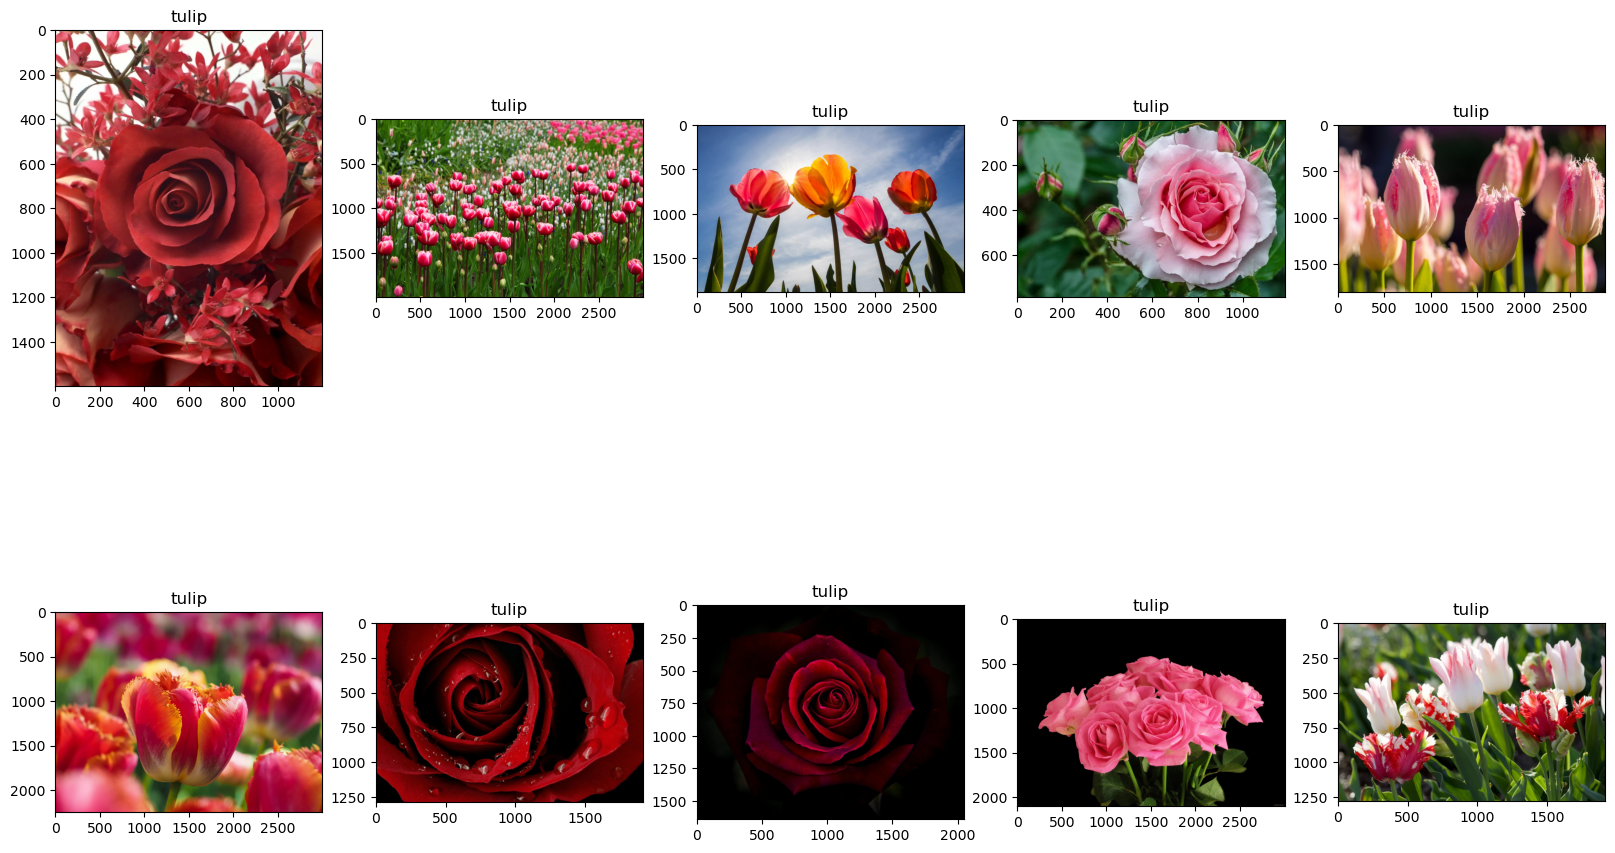

In [37]:
class_ = {0: 'rose', 1: 'tulip'}

fig, axes = plt.subplots(2, 5, figsize=(20, 12), facecolor='w')

for ax in axes.ravel():
    
    i = random.choice(submission['id'].values)
    
    label = submission.loc[submission['id'] == i, 'label'].values[0]
    if label > 0.5:
        label = 1
    else:
        label = 0
        
    img_path = os.path.join(test_path, '{}.jpg'.format(i))
    img = Image.open(img_path)
    
    ax.set_title(class_[label])
    ax.imshow(img)